In [1]:
# Importing relevant packages here:
import random
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.community as nx_comm
import csv
from random import sample
import pandas as pd
import requests 
from bs4 import BeautifulSoup
from itertools import permutations

Question 1 Part a done below

In [4]:
# Load the CSV file as a DataFrame
disease_genes_df = pd.read_csv('disgenet-genesets.csv', header=None)

# Extract the genes from a specific row (The one with the disease Hepatomegaly)
#print(disease_genes_df.iloc[0].dropna().drop(0))
Hepatomegaly = disease_genes_df.iloc[0].dropna().drop(0)

for a in Hepatomegaly:
    print(a)

# Report the number of genes found
num_genes = len(Hepatomegaly)
print(f'Number of genes found for Hepatomegaly: {num_genes}')

A1BG
AHR
ALB
ALDH1B1
CAMK2A
CRYGD
MAPK14
CYBA
CYP1A1
CYP1A2
CYP1B1
ADAM3A
DSCAM
FGF12
NR5A2
HDC
IGKC
LEP
LEPR
MYO1B
TRIM37
NFE2L2
NOS2
NOS3
PEPD
PPARA
RELA
TGFB1
NR1H2
KLF11
COPS3
ABCC3
NR1I2
ATG5
ADAMTSL2
KEAP1
NR1I3
NR1H4
ADAMTS5
AKR7A3
MLC1
DAPK2
SLC29A3
SESN2
CYGB
GALNT13
MBOAT2
GPR155
SBSPON
PRSS35
CABCOCO1
STAC3
MIR192
ACOT1
Number of genes found for Hepatomegaly: 54


C:\Users\User\AppData\Local\Temp\ipykernel_10500\2765708263.py:2: DtypeWarning: Columns (62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,2

Question 1 Part B done below (not working yet but in progress)

In [56]:
disease_genes = list(disease_genes_df.iloc[0].dropna().drop(0))

# Get the list of KEGG pathway IDs
pathway_ids_url = 'https://www.genome.jp/kegg/pathway.html'
response = requests.get(pathway_ids_url)
soup = BeautifulSoup(response.text, 'html.parser')
pathway_ids = [a['href'].split('/')[-1] for a in soup.select('#pathway_table a')]

print(pathway_ids)

# Loop through each pathway and check if it contains any disease-associated genes
for pathway_id in pathway_ids:
    pathway_url = f'https://www.genome.jp/kegg-bin/show_pathway?{pathway_id}+map00001'
    response = requests.get(pathway_url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    gene_symbols = []
    for img in soup.select('img[alt^="Hsa"]'):
        gene_symbol = img['alt'].split(':')[1]
        gene_symbols.append(gene_symbol)
    
    overlapping_genes = list(set(gene_symbols) & set(disease_genes))
    print(overlapping_genes)

[]


Code for Question 2 Part b starts below

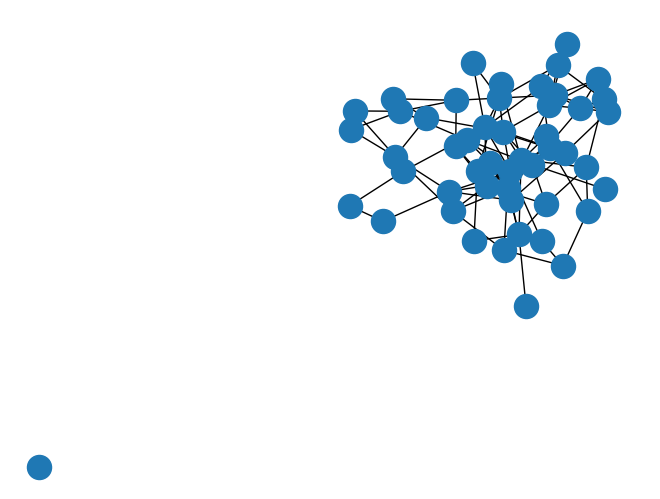

In [57]:
# Generating a random unidirected network to use in # of nodes, modularity correlation plot:

random_graph = nx.gnm_random_graph(50, 100, seed=None, directed=False)
nx.draw(random_graph)
plt.xlabel("this is the random graph with 50 nodes and 100 edges")
plt.show()

In [58]:
# This function takes a graph, and a community size and generates the random partition 
def random_subsets(G, size):
    # subset of entire environment
    node_environment = list(range(0,G.number_of_nodes()))
    node_environment = set(node_environment)
    #create a subset of size increment
    random_community = sample(list(G.nodes()), size)
    #remove these nodes from the partition environment
    node_environment.difference_update(random_community)
    random_community = set(random_community)
    return [random_community, node_environment]

print(random_subsets(random_graph,5))


[{5, 10, 45, 24, 26}, {0, 1, 2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49}]


[0.014999999999999951, 0.0019499999999999483, -0.03645000000000005, -0.01120000000000005, -0.04820000000000001, -0.03444999999999994, 0.061549999999999994, 0.014999999999999944, -0.07645, 0.016799999999999954, -0.04720000000000002, 0.019800000000000012, 0.04874999999999996, -0.04980000000000004, 0.023549999999999988, 0.0021999999999999797, 0.018750000000000017, 0.04320000000000007, 0.009549999999999968, 0.022199999999999886, 0.00619999999999999, 0.035800000000000026, -0.011250000000000104, -0.005000000000000058, 0.0]


Text(0.5, 1.0, 'Size of Random Subset vs Modularity Calculated')

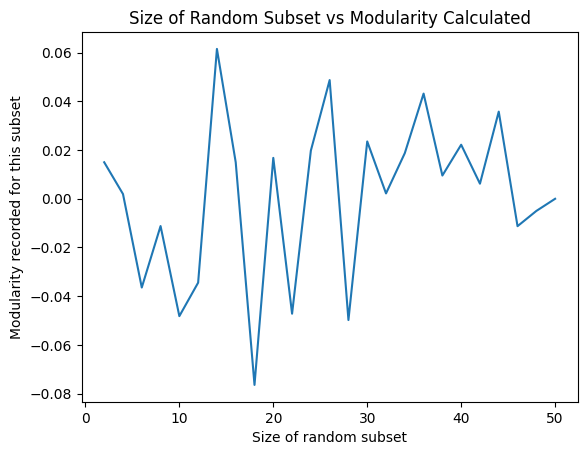

In [59]:
size = 2
community_list = []
modularity_data = []
sample_size_arr = []
while size < 52:
    sample_size_arr.append(size)
    community_list.append(random_subsets(random_graph,size))
    size = size + 2

for x in community_list:
    modularity_data.append(nx_comm.modularity(random_graph,x))

print(modularity_data)
plt.plot(sample_size_arr, modularity_data)
plt.xlabel("Size of random subset")
plt.ylabel("Modularity recorded for this subset")
plt.title("Size of Random Subset vs Modularity Calculated")

Code for Question 2 Part b Alternative

In [60]:
# Define the modularity statistic as a function
def modularity(S, G):
    m = G.number_of_edges()
    ki = dict(G.degree())
    A = nx.to_numpy_array(G)
    S_indices = [i for i, n in enumerate(G.nodes()) if n in S]
    S_size = len(S_indices)
    S_mask = np.zeros((G.number_of_nodes(), 1))
    S_mask[S_indices] = 1
    kis = ki.values()
    kis = np.asarray(list(kis))
    ki_sum = np.sum(kis)
    expected_frac = (ki_sum / (2 * m)) ** 2
    A_S = np.multiply(A, np.dot(S_mask, S_mask.T))
    m_S = np.sum(kis[S_indices]) / 2
    modularity_S = np.sum(A_S) / (2 * m) - expected_frac * (m_S / m) ** 2
    return modularity_S

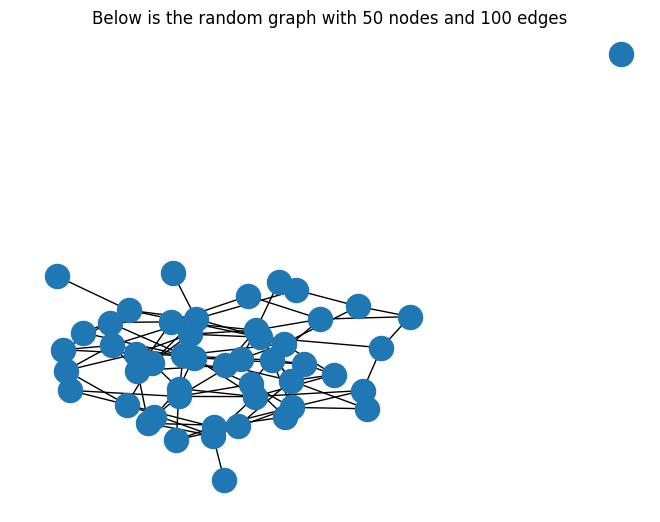

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]


In [61]:
# create a random network with 50 nodes and 100 edges
G = nx.gnm_random_graph(50, 100, directed = False)

# define the range of sizes for the random sets of nodes
sizes = np.arange(5, 25, 5)

# Define the number of repetitions for each size
num_reps = 50

# Initialize an array to store the modularity values
modularities = np.zeros((len(sizes), num_reps))

# Print the graph and all the values below
nx.draw(G)
plt.title("Below is the random graph with 50 nodes and 100 edges")
plt.show()
print(modularities)

In [62]:
# Loop over the sizes and repetitions and compute the modularity for each random set of nodes
for i, size in enumerate(sizes):
    for j in range(num_reps):
        S = set(np.random.choice(G.nodes(), size, replace=False))
        modularities[i, j] = modularity(S, G)

# Calculate the mean and standard deviation of the modularity values for each size
mean_modularities = np.mean(modularities, axis=1)
std_modularities = np.std(modularities, axis=1)

print(mean_modularities)
print(std_modularities)

[-0.0022665 -0.007245  -0.000737  -0.005892 ]
[0.00843813 0.01560664 0.01561945 0.01857351]


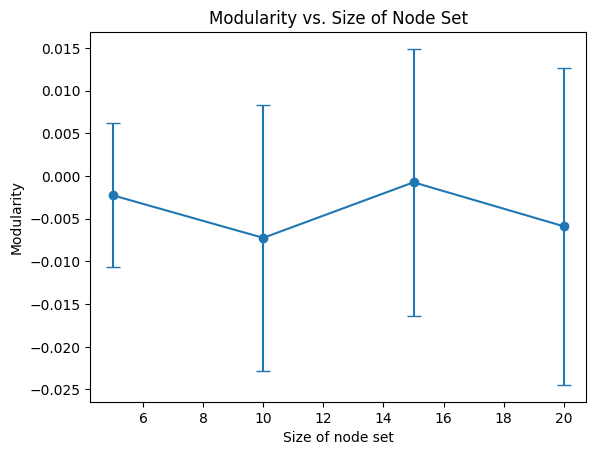

In [63]:
# Plot the modularity as a function of size
plt.errorbar(sizes, mean_modularities, yerr=std_modularities, fmt='o-', capsize=5)
plt.xlabel('Size of node set')
plt.ylabel('Modularity')
plt.title('Modularity vs. Size of Node Set')
plt.show()

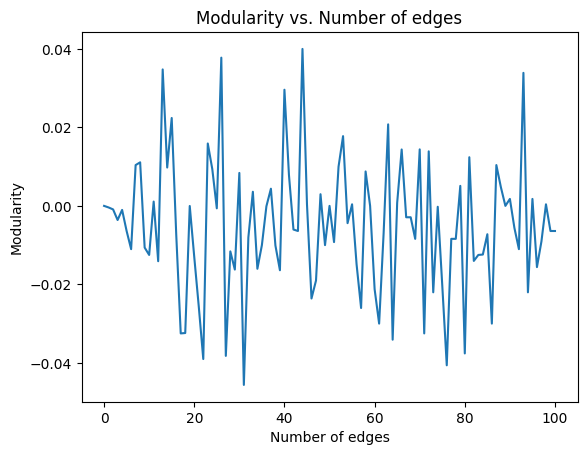

In [64]:
# Plot the modularity as a function of the number of edges
num_edges = np.arange(G.number_of_edges() + 1)
modularity_vs_edges = np.zeros(len(num_edges))
for i, num_edge in enumerate(num_edges):
    G_sub = nx.subgraph(G, np.random.choice(G.nodes(), num_edge, replace=True))
    modularity_vs_edges[i] = modularity(set(G_sub.nodes()), G)
plt.plot(num_edges, modularity_vs_edges, '-')
plt.xlabel('Number of edges')
plt.ylabel('Modularity')
plt.title('Modularity vs. Number of edges')
plt.show()

# Question 2 Part C Code below

In [65]:
# Read contents of csv file
file = pd.read_csv("hippie-ppi.csv")

# Display modified csv file
data= pd.read_csv("hippie-ppi.csv")
ppi = nx.from_pandas_edgelist(data, source = 'from', target = 'to')
print (data)

           to   from
0       AL1A1  AL1A1
1        ITA7   ACHA
2        NEB1   ACTG
3        SRGN   CD44
4        GRB7  ERBB2
...       ...    ...
411425   CH60   RM41
411426  CS010   MTL5
411427   KI67   C1TM
411428   DUX4  TBB2A
411429  DICER   ADT2

[411430 rows x 2 columns]


In [66]:
print("This is the number of nodes :", ppi.number_of_nodes(), "This is the number of edges : ", ppi.number_of_edges())

This is the number of nodes : 17336 This is the number of edges :  383481


In [67]:
def unidentifiedGene(arr):
    genes_to_remove = []
    for x in arr:
        try:
            list(ppi.nodes).index(x)
        except:
            genes_to_remove.append(x)
    return set(arr) - set(genes_to_remove)


Hepatomegaly_gene_set = unidentifiedGene(Hepatomegaly)
print(Hepatomegaly_gene_set)

{'NR1I2', 'DSCAM', 'NOS2', 'STAC3', 'FGF12', 'ACOT1', 'HDC', 'NR1H2', 'PEPD', 'TGFB1', 'MYO1B', 'AHR', 'NR5A2', 'ATG5', 'NR1H4', 'PPARA', 'DAPK2', 'IGKC', 'NOS3', 'LEP', 'KLF11', 'NR1I3', 'LEPR', 'A1BG', 'KEAP1', 'CYGB', 'SESN2', 'MLC1'}


In [68]:
def defined_subsets(G, arr):
    # subset of entire environment
    node_environment = set(G.nodes)
    node_environment = set(node_environment)
    #create a subset of size increment
    disease_associated_genes = arr
    #remove these nodes from the partition environment
    node_environment.difference_update(disease_associated_genes)
    disease_associated_genes = set(disease_associated_genes)
    return (disease_associated_genes, node_environment)

In [69]:
# Create the communities to be used for analysis
Hepatomegaly_subset = defined_subsets(ppi, Hepatomegaly_gene_set)

In [70]:
modularity_Hepatomegaly = nx_comm.modularity(ppi, Hepatomegaly_subset)

# Below is the modularity of Hepatomegaly

In [71]:
print("This is the Modularity of Hepatomegaly :", modularity_Hepatomegaly)

This is the Modularity of Hepatomegaly : 9.654497306616665e-05


In [72]:
valid_partition = nx_comm.kernighan_lin_bisection(ppi)
print(nx_comm.modularity(ppi,valid_partition))

0.058677084721782805


# Using Permutation Tests to Assess Statistical Significance

In [73]:
def random_subsets_permutation_tests(G, size):
    # subset of entire environment
    node_environment = set(G.nodes)
    #node_environment = set(node_environment);
    #create a subset of size increment
    random_community = sample(list(G.nodes()), size)
    #remove these nodes from the partition environment
    node_environment.difference_update(random_community)
    random_community = set(random_community)
    return [random_community, node_environment]

In [74]:
# generate a random set that is the same size as the Hepatomegaly Data set
size = len(Hepatomegaly_subset[0])
sample_subset = random_subsets_permutation_tests(ppi,size)
sample_subset_modularity = nx_comm.modularity(ppi,sample_subset)
print("Below is the modularity of a random subset of the ppi data set :", sample_subset_modularity)

Below is the modularity of a random subset of the ppi data set : 7.604893332117832e-05


In [75]:
# Generate sets of random permuations with both data sets
def permutation_modularities(G, disease_subset, sample_subset, size, num_permutations):
    modularities = []
    merged_arr = list(disease_subset[0].union(sample_subset[0]))
    for x in range(num_permutations):
        permutation = sample(merged_arr, size)
        permutation_sorted = sorted(permutation)
        save = defined_subsets(ppi, permutation_sorted)
        modularities.append(nx_comm.modularity(ppi, save))
    return modularities

In [76]:
def plot_modularity_diff(mod_arr, disease_modularity):
    for i in range(len(mod_arr)):
        mod_arr[i] = mod_arr[i] - disease_modularity
    
    fig, ax = plt.subplots(figsize =(10, 7))
    ax.hist(mod_arr)
 
    # Show plot
    plt.show()

# A histogram showing the distribution of the difference between a random sample and Hepatomegaly Modularity

[7.959468495658242e-05, 6.360103170297678e-05, 8.203547217987511e-05, 8.756861750501774e-05, 5.750604899894778e-05, 7.648367430951197e-05, 6.076924483208407e-05, 5.644299671360687e-05, 6.576207154602674e-05, 7.832019522327835e-05, 7.654195416376491e-05, 5.89000428636959e-05, 5.690904514593008e-05, 6.286292675013432e-05, 6.74011427208352e-05, 8.042957166366391e-05, 6.279230139968089e-05, 9.342550315315348e-05, 8.432628763445225e-05, 8.146025229672955e-05, 8.930968947478127e-05, 6.580110725014907e-05, 5.779405504369481e-05, 5.5445887942126356e-05, 8.739248253209901e-05, 9.581981881438177e-05, 6.244484249159812e-05, 8.254025371416967e-05, 8.240325644641893e-05, 3.788835849975285e-05, 7.356215393939243e-05, 8.189231406419976e-05, 7.232446609293993e-05, 7.080343023798213e-05, 5.7482371214476194e-05, 5.8545015496633723e-05, 7.175572326015e-05, 5.808915354361479e-05, 7.802249910306498e-05, 8.608397893382594e-05, 7.319946971258526e-05, 5.409047757815646e-05, 7.86232429852451e-05, 4.83118979402

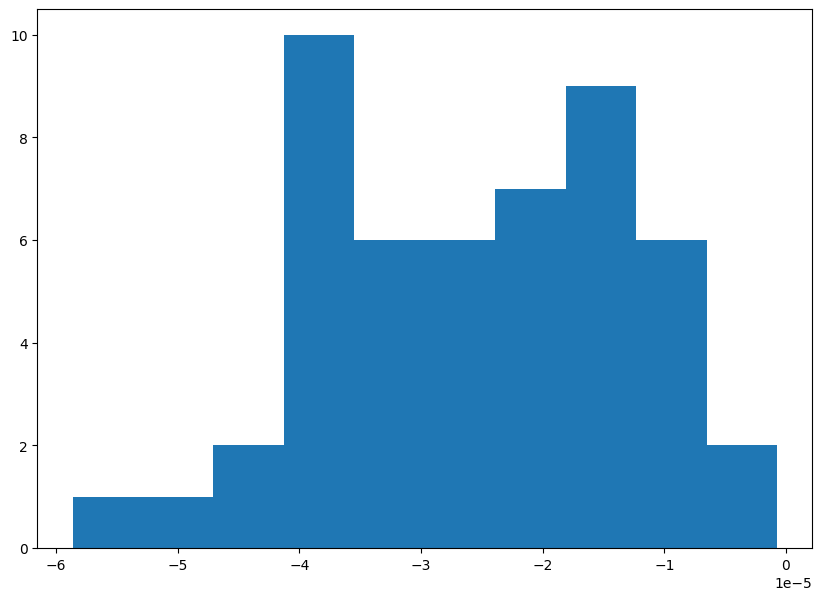

In [77]:
save = permutation_modularities(ppi,Hepatomegaly_subset,sample_subset,len(Hepatomegaly_subset[0]),50)
print(save)
plot_modularity_diff(save,modularity_Hepatomegaly)

In [78]:
print(modularity_Hepatomegaly)

9.654497306616665e-05


# Back up code for Question 2c (Not completed. Above one is better)

In [79]:
# load disease gene set
disease_genes = list(Hepatomegaly)

# load protein-protein interaction network
ppi_df = pd.read_csv('hippie-ppi.csv')
G = nx.from_pandas_edgelist(ppi_df, source='from', target='to')

# extract subgraph induced by disease genes
subgraph_nodes = list(set(G.nodes()).intersection(set(disease_genes)))
subgraph = G.subgraph(subgraph_nodes)
print(subgraph)

Graph with 28 nodes and 20 edges


# Question 3 Code starts below

In [6]:
# Step 1: Load the data
df = pd.read_csv("disgenet-genesets.csv")

# Step 2: Create a set of all genes
genes = set()
for row in df.itertuples(index=False):
    genes.update(set(row[1:]))
    
# Step 3: Create a dictionary mapping each gene to a set of associated diseases
gene_disease_map = {}
for row in df.itertuples(index=False):
    disease = row[0]
    for gene in genes:
        if gene in row[1:]:
            if gene not in gene_disease_map:
                gene_disease_map[gene] = set()
            gene_disease_map[gene].add(disease)


C:\Users\User\AppData\Local\Temp\ipykernel_24756\1513215708.py:2: DtypeWarning: Columns (62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,2

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\User\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\User\AppData\Local\Temp\ipykernel_24756\1513215708.py", line -1, in <module>
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\User\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\AppData\Roaming\Python\Python311\site-packages\IPython\core\ultratb.py", line 1118, in structured_traceback
    return FormattedTB.structured_traceback(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\AppData\Roaming\Python\Python311\site-packages\IPython\core\ultratb.py", line 1012, in stru

In [7]:
# Step 4: Create a graph using networkx library with thresholding
G = nx.Graph()
for gene1 in gene_disease_map:
    for gene2 in gene_disease_map:
        if gene1 == gene2:
            continue
        common_diseases = gene_disease_map[gene1].intersection(gene_disease_map[gene2])
        if len(common_diseases) >= 2:  # set the threshold here as 2
            G.add_edge(gene1, gene2)

In [8]:
# Step 5: Report the number of nodes and edges of the graph
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 5548
Number of edges: 898090


# Question 3b done below

In [15]:
df_human_ppi = pd.read_csv('hippie-ppi.csv')

G2 = nx.Graph()

# Add nodes to the graph
for i, row in df_human_ppi.iterrows():
    G2.add_node(row[0])
    G2.add_node(row[1])

# Add edges to the graph
for i, row in df_human_ppi.iterrows():
    G2.add_edge(row[0], row[1])

# Calculate the sets of edges in the two networks
edges1 = set(G.edges())
edges2 = set(G2.edges())

jaccard_index = len(edges1.intersection(edges2)) / len(edges1.union(edges2))

print(jaccard_index)

0.0018135612166806983


# Question 3c done below

In [ ]:
# Get the set of common nodes between the two networks
common_nodes = set(G.nodes()).intersection(set(G2.nodes()))

# Create two subgraphs using the common nodes
G1_sub = G.subgraph(common_nodes)
G2_sub = G2.subgraph(common_nodes)

# Calculate the Jaccard similarity between the two subgraphs
similarity = nx.jaccard_coefficient(G1_sub, G2_sub)

# Sort the nodes by their similarity coefficient and print the top 10 nodes
sorted_nodes = sorted(similarity, key=lambda x: x[2], reverse=True)
top_nodes = [node for node, _, _ in sorted_nodes[:10]]
print(top_nodes)

# Get the neighbors of each node in G1 and G2
G1_neighbors = {node: set(G.neighbors(node)) for node in G.nodes()}
G2_neighbors = {node: set(G2.neighbors(node)) for node in G2.nodes()}

# Count the number of common neighbors for each node in the common set of nodes
common_neighbors = {}
for node in common_nodes:
    common_neighbors[node] = len(G1_neighbors[node].intersection(G2_neighbors[node]))

# Sort the nodes by their number of common neighbors and print the top 10 nodes
sorted_nodes = sorted(common_neighbors.items(), key=lambda x: x[1], reverse=True)
top_nodes = [node for node, count in sorted_nodes[:10]]
print(top_nodes)

# Question 1a and 1b done below

In [1]:
import pandas as pd
columnNames = []

for x in range (884):
    if x == 0:
        columnNames.append("disease")
    else:
        columnNames.append(str(x))

disgenet_data = pd.read_csv("disgenet-genesets.csv", names = columnNames, dtype = (str), infer_datetime_format=(False))
print(disgenet_data)

                                disease         1         2       3        4  \
0                 DISGENET_Hepatomegaly      A1BG       AHR     ALB  ALDH1B1   
1                DISGENET_Schizophrenia      A1BG     ABCA1    ACHE     ACP1   
2          DISGENET_Alzheimer's_Disease       A2M      ACHE  ADAM10     AMFR   
3     DISGENET_Malignant_tumor_of_colon       A2M     ACTA2   ACTG2    PARP4   
4            DISGENET_Colonic_Neoplasms       A2M     ACTA2   ACTG2    PARP4   
...                                 ...       ...       ...     ...      ...   
1359    DISGENET_Meckel_syndrome_type_1     KIF14  RPGRIP1L   NPHP3     B9D1   
1360    DISGENET_Meckel-Gruber_syndrome  RPGRIP1L      B9D1   WDPCP  TMEM216   
1361           DISGENET_Carcinoid_Tumor    MIR10A    MIR127  MIR136  MIR146A   
1362    DISGENET_Carcinoid,_Goblet_Cell    MIR10A    MIR127  MIR136  MIR146A   
1363            DISGENET_Argentaffinoma    MIR10A    MIR127  MIR136  MIR146A   

            5        6        7        

In [12]:
hepatomegaly = disgenet_data.loc[0,:]
print(hepatomegaly)

hepatomegaly_genes = []

for index, value in hepatomegaly.items():
    if str(value) != "NaN" and str(value) != "nan" and str(index) != "disease":
        hepatomegaly_genes.append(value)
        
print(hepatomegaly_genes)

disease    DISGENET_Hepatomegaly
1                           A1BG
2                            AHR
3                            ALB
4                        ALDH1B1
                   ...          
879                          NaN
880                          NaN
881                          NaN
882                          NaN
883                          NaN
Name: 0, Length: 884, dtype: object
['A1BG', 'AHR', 'ALB', 'ALDH1B1', 'CAMK2A', 'CRYGD', 'MAPK14', 'CYBA', 'CYP1A1', 'CYP1A2', 'CYP1B1', 'ADAM3A', 'DSCAM', 'FGF12', 'NR5A2', 'HDC', 'IGKC', 'LEP', 'LEPR', 'MYO1B', 'TRIM37', 'NFE2L2', 'NOS2', 'NOS3', 'PEPD', 'PPARA', 'RELA', 'TGFB1', 'NR1H2', 'KLF11', 'COPS3', 'ABCC3', 'NR1I2', 'ATG5', 'ADAMTSL2', 'KEAP1', 'NR1I3', 'NR1H4', 'ADAMTS5', 'AKR7A3', 'MLC1', 'DAPK2', 'SLC29A3', 'SESN2', 'CYGB', 'GALNT13', 'MBOAT2', 'GPR155', 'SBSPON', 'PRSS35', 'CABCOCO1', 'STAC3', 'MIR192', 'ACOT1']


In [20]:
import gseapy as gp
from tabulate import tabulate
from gseapy.plot import barplot, dotplot

In [16]:
enriched_genes = gp.enrichr(gene_list=hepatomegaly_genes, gene_sets=['KEGG_2021_Human'])
print(tabulate(enriched_genes.results.head(5)))

-  ---------------  --------------------------------------  -----  -----------  -----------  -  -  -------  -------  ------------------------------------------
0  KEGG_2021_Human  Diabetic cardiomyopathy                 7/203  1.18312e-06  8.65035e-05  0  0  15.0076  204.814  TGFB1;NOS3;CAMK2A;CYBA;MAPK14;PPARA;RELA
1  KEGG_2021_Human  Lipid and atherosclerosis               7/215  1.73554e-06  8.65035e-05  0  0  14.1332  187.465  NOS3;CAMK2A;CYP1A1;CYBA;MAPK14;RELA;NFE2L2
2  KEGG_2021_Human  Fluid shear stress and atherosclerosis  6/139  1.98517e-06  8.65035e-05  0  0  18.6212  244.493  NOS3;KEAP1;CYBA;MAPK14;RELA;NFE2L2
3  KEGG_2021_Human  Leishmaniasis                           5/77   2.02347e-06  8.65035e-05  0  0  28.1661  369.277  TGFB1;NOS2;CYBA;MAPK14;RELA
4  KEGG_2021_Human  Chemical carcinogenesis                 7/239  3.49936e-06  0.000106463  0  0  12.6557  158.993  NR1I3;CYP1A2;CYP1A1;CYP1B1;AHR;PPARA;RELA
-  ---------------  --------------------------------------  ----- 

<AxesSubplot: title={'center': 'KEGG 2021 Database'}, xlabel='Combined Score'>

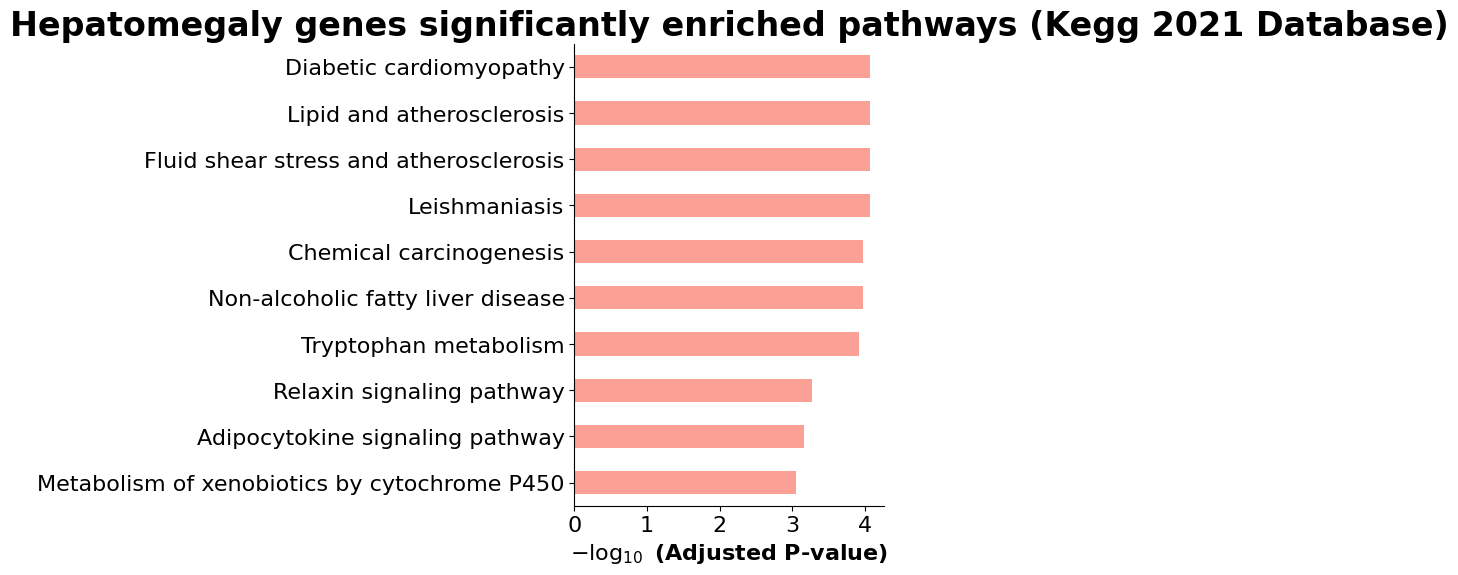

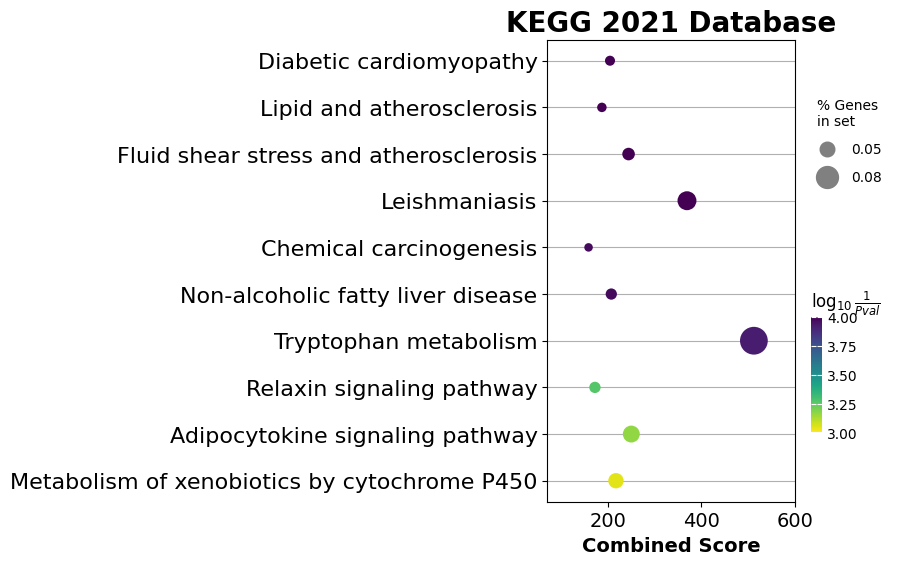

In [21]:
barplot(enriched_genes.res2d, title='Hepatomegaly genes significantly enriched pathways (Kegg 2021 Database)')
dotplot(enriched_genes.res2d, title='KEGG 2021 Database', size=35)